##### In american football, to predict the passing yards for  quarterback, trying with adding previous year data

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
import seaborn

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# file_path = r"../../../data/NCAA/input_data/ncaa_2024_input_data_v001.csv"
team_reg_file_path_2024 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2024_team_stats_reg_v001.csv"
team_pst_file_path_2024 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2024_team_stats_pst_v001.csv"
team_reg_file_path_2023 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2023_team_stats_reg_v001.csv"
team_pst_file_path_2023 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2023_team_stats_pst_v001.csv"

player_reg_file_path_2024 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2024_player_stats_reg_v001.csv"
player_pst_file_path_2024 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2024_player_stats_pst_v001.csv"
player_reg_file_path_2023 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2023_player_stats_reg_v001.csv"
player_pst_file_path_2023 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2023_player_stats_pst_v001.csv"

# team_stats_file_path_2024 = r"../../../data/NFL/input_data/nfl_2024_team_stats_v002.csv"
# file_path_2023 = r"../../../data/NFL/input_data/nfl_2023_player_stats_v001.csv"
# team_stats_file_path_2023 = r"../../../data/NFL/input_data/nfl_2023_team_stats_v001.csv"
# file_path_2022 = r"../../../data/NFL/input_data/nfl_2022_player_stats_v001.csv"
# team_stats_file_path_2022 = r"../../../data/NFL/input_data/nfl_2022_team_stats_v001.csv"
# file_path_2021 = r"../../../data/NFL/input_data/nfl_2021_player_stats_v001.csv"
# team_stats_file_path_2021 = r"../../../data/NFL/input_data/nfl_2021_team_stats_v001.csv"
# file_path_2020 = r"../../../data/NFL/input_data/nfl_2020_player_stats_v001.csv"
# team_stats_file_path_2020 = r"../../../data/NFL/input_data/nfl_2020_team_stats_v001.csv"

# df = pd.read_csv(file_path_)
# df_team = pd.read_excel(team_stats_file_path)
# df = pd.read_excel(file_path, sheet_name= 0, skiprows=[1])

In [3]:
def read_csv(list):
    results = []
    for addr in list:
        df = pd.read_csv(addr)
        # print(df.head())
        results.append(df)
    return results


team_df_list = read_csv([team_reg_file_path_2024, team_pst_file_path_2024, team_reg_file_path_2023, team_pst_file_path_2023])
players_df_list = read_csv([player_reg_file_path_2024, player_pst_file_path_2024, player_reg_file_path_2023, player_pst_file_path_2023])

# players_df_list = read_csv([file_path_2020, file_path_2021, file_path_2022, file_path_2023, file_path_2024])
# team_df_list = read_csv([ team_stats_file_path_2020, team_stats_file_path_2021, team_stats_file_path_2022, team_stats_file_path_2023, team_stats_file_path_2024])

C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_12328\1958992641.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(addr)
C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_12328\1958992641.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(addr)


In [4]:
# print(players_df_list)

In [5]:
df = pd.concat(players_df_list)
df_team = pd.concat(team_df_list)

In [6]:
df.head()
df_team.head()

,game_id,game_sr_id,team_name,team_id,team_sr_id,opponent_name,opponent_id,opponent_sr_id,team_market,team_alias,game_date,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_tlost,rushing_tlost_yards,rushing_yards,rushing_longest,rushing_redzone_attempts,rushing_first_downs,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,receiving_targets,receiving_receptions,receiving_avg_yards,receiving_yards,receiving_touchdowns,receiving_yards_after_catch,receiving_longest,receiving_longest_touchdown,receiving_redzone_targets,receiving_air_yards,receiving_first_downs,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,punts_attempts,punts_yards,punts_net_yards,punts_blocked,punts_touchbacks,punts_inside_20,punts_return_yards,punts_avg_net_yards,punts_avg_yards,punts_longest,punts_hang_time,punts_avg_hang_time,punt_returns_avg_yards,punt_returns_yards,punt_returns_longest,punt_returns_touchdowns,punt_returns_faircatches,punt_returns_number,penalties_penalties,penalties_yards,penalties_first_downs,passing_attempts,passing_completions,passing_cmp_pct,passing_interceptions,passing_sack_yards,passing_rating,passing_touchdowns,passing_avg_yards,passing_sacks,passing_longest,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_net_yards,passing_yards,passing_first_downs,passing_int_touchdowns,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_avg_pocket_time,passing_batted_passes,passing_on_target_throws,misc_returns_yards,misc_returns_touchdowns,misc_returns_blk_fg_touchdowns,misc_returns_blk_punt_touchdowns,misc_returns_fg_return_touchdowns,misc_returns_ez_rec_touchdowns,misc_returns_number,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_net_attempts,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_sp_own_fumble_recoveries,defense_sp_opp_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,defense_three_and_outs_forced,defense_fourth_down_stops,first_downs_pass,first_downs_penalty,first_downs_rush,first_downs_total,interceptions_return_yards,interceptions_returned,interceptions_number,touchdowns_pass,touchdowns_rush,touchdowns_total_return,touchdowns_total,touchdowns_fumble_return,touchdowns_int_return,touchdowns_kick_return,touchdowns_punt_return,touchdowns_other,efficiency_goaltogo_attem

In [7]:
df.columns.to_list()

['game_id',
 'game_sr_id',
 'player_name',
 'player_id',
 'team_name',
 'team_id',
 'team_sr_id',
 'opponent_name',
 'opponent_id',
 'opponent_sr_id',
 'team_market',
 'team_alias',
 'team_position',
 'team_jersey',
 'game_date',
 'rushing_first_downs',
 'rushing_avg_yards',
 'rushing_attempts',
 'rushing_touchdowns',
 'rushing_yards',
 'rushing_longest',
 'rushing_redzone_attempts',
 'rushing_tlost',
 'rushing_tlost_yards',
 'rushing_broken_tackles',
 'rushing_kneel_downs',
 'rushing_scrambles',
 'rushing_yards_after_contact',
 'venue_id',
 'venue_name',
 'venue_city',
 'venue_state',
 'venue_country',
 'venue_zip',
 'venue_address',
 'venue_capacity',
 'venue_surface',
 'venue_roof_type',
 'venue_sr_id',
 'venue_location_lat',
 'venue_location_lng',
 'receiving_first_downs',
 'receiving_receptions',
 'receiving_targets',
 'receiving_yards',
 'receiving_avg_yards',
 'receiving_longest',
 'receiving_touchdowns',
 'receiving_yards_after_catch',
 'receiving_redzone_targets',
 'receiving_

In [8]:
df[df['team_position'] == 'QB'].head()

,game_id,game_sr_id,player_name,player_id,team_name,team_id,team_sr_id,opponent_name,opponent_id,opponent_sr_id,team_market,team_alias,team_position,team_jersey,game_date,rushing_first_downs,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_yards,rushing_longest,rushing_redzone_attempts,rushing_tlost,rushing_tlost_yards,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,venue_id,venue_name,venue_city,venue_state,venue_country,venue_zip,venue_address,venue_capacity,venue_surface,venue_roof_type,venue_sr_id,venue_location_lat,venue_location_lng,receiving_first_downs,receiving_receptions,receiving_targets,receiving_yards,receiving_avg_yards,receiving_longest,receiving_touchdowns,receiving_yards_after_catch,receiving_redzone_targets,receiving_air_yards,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,receiving_longest_touchdown,punts_attempts,punts_yards,punts_avg_yards,punts_blocked,punts_longest,punts_touchbacks,punts_inside_20,punts_avg_net_yards,punts_return_yards,punts_net_yards,punts_hang_time,punts_avg_hang_time,punt_returns_yards,punt_returns_avg_yards,punt_returns_touchdowns,punt_returns_longest,punt_returns_faircatches,punt_returns_number,penalties_first_downs,penalties_penalties,penalties_yards,passing_first_downs,passing_attempts,passing_completions,passing_cmp_pct,passing_yards,passing_avg_yards,passing_sacks,passing_sack_yards,passing_touchdowns,passing_longest,passing_interceptions,passing_rating,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_int_touchdowns,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_avg_pocket_time,passing_batted_passes,passing_on_target_throws,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_sp_own_fumble_recoveries,defense_sp_opp_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,rushing_longest_touchdown
2,0066198b-955a-4008-be7e-dc52522b4d74,sr:match:50128561,Geno Smith,cfc93f5e-105e-4a5e-88d3-f4279893cfa8,Seahawks,3d08af9e-c767-4f88-a7dc-b920c6d2b4a8,sr:competitor:4430,Cardinals,de760528-1dc0-416a-a978-b510d20692ff,sr:competitor:4412,Seattle,SEA,QB,7.0,2024-11-24,0.0,0.667,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,c6b9e5df-c9e4-434c-b3e6-83928f11cbda,Lumen Field,Seattle,WA,USA,98134.0,

In [9]:
df.team_position.unique()

array(['RB', 'QB', 'WR', 'TE', 'P', 'CB', 'K', 'DT', 'FS', 'SS', 'DE',
       'OLB', 'LB', 'NT', 'OL', 'DL', 'SAF', 'C', 'OT', 'G', 'DB', 'MLB',
       'T', 'OG', 'FB', 'LS'], dtype=object)

In [10]:
df.columns.to_list()

['game_id',
 'game_sr_id',
 'player_name',
 'player_id',
 'team_name',
 'team_id',
 'team_sr_id',
 'opponent_name',
 'opponent_id',
 'opponent_sr_id',
 'team_market',
 'team_alias',
 'team_position',
 'team_jersey',
 'game_date',
 'rushing_first_downs',
 'rushing_avg_yards',
 'rushing_attempts',
 'rushing_touchdowns',
 'rushing_yards',
 'rushing_longest',
 'rushing_redzone_attempts',
 'rushing_tlost',
 'rushing_tlost_yards',
 'rushing_broken_tackles',
 'rushing_kneel_downs',
 'rushing_scrambles',
 'rushing_yards_after_contact',
 'venue_id',
 'venue_name',
 'venue_city',
 'venue_state',
 'venue_country',
 'venue_zip',
 'venue_address',
 'venue_capacity',
 'venue_surface',
 'venue_roof_type',
 'venue_sr_id',
 'venue_location_lat',
 'venue_location_lng',
 'receiving_first_downs',
 'receiving_receptions',
 'receiving_targets',
 'receiving_yards',
 'receiving_avg_yards',
 'receiving_longest',
 'receiving_touchdowns',
 'receiving_yards_after_catch',
 'receiving_redzone_targets',
 'receiving_

In [11]:
# df = df.drop(columns=['team'])
df.team_position.unique()

array(['RB', 'QB', 'WR', 'TE', 'P', 'CB', 'K', 'DT', 'FS', 'SS', 'DE',
       'OLB', 'LB', 'NT', 'OL', 'DL', 'SAF', 'C', 'OT', 'G', 'DB', 'MLB',
       'T', 'OG', 'FB', 'LS'], dtype=object)

In [12]:
df.passing_yards.value_counts(normalize=True).sort_index()

passing_yards
-7.0      0.000702
-4.0      0.000702
-2.0      0.001404
-1.0      0.002107
 0.0      0.057584
 1.0      0.002107
 2.0      0.002809
 3.0      0.008427
 4.0      0.006320
 5.0      0.004916
 6.0      0.007725
 7.0      0.001404
 8.0      0.002809
 9.0      0.001404
 11.0     0.002809
 12.0     0.001404
 13.0     0.003511
 14.0     0.002809
 15.0     0.001404
 16.0     0.002809
 17.0     0.002809
 18.0     0.003511
 19.0     0.002809
 20.0     0.003511
 21.0     0.002107
 22.0     0.003511
 23.0     0.002107
 24.0     0.003511
 25.0     0.002107
 26.0     0.000702
 27.0     0.000702
 28.0     0.002107
 30.0     0.000702
 31.0     0.001404
 33.0     0.000702
 34.0     0.001404
 35.0     0.001404
 36.0     0.000702
 37.0     0.001404
 38.0     0.002107
 39.0     0.000702
 41.0     0.001404
 42.0     0.000702
 44.0     0.000702
 45.0     0.000702
 46.0     0.000702
 49.0     0.001404
 50.0     0.000702
 52.0     0.000702
 54.0     0.001404
 55.0     0.002107
 56.0     0.00280

In [13]:
# # Ensure 'game_date' is in datetime format
# df['game_date'] = pd.to_datetime(df['game_date'])

# print("Original DataFrame head:")
# print(df.head())
# print("\n" + "="*50 + "\n")

# # --- Player-Level Offensive Metrics ---

# # player_total_shots
# df['player_total_shots'] = df['shots_on_target'] + df['shots_off_target'] + df['shots_blocked']

# # player_shot_accuracy
# # Use np.where to handle division by zero (if player_total_shots is 0, accuracy is 0)
# # df['player_shot_accuracy'] = np.where(
# #     df['player_total_shots'] == 0,
# #     0,
# #     df['shots_on_target'] / df['player_total_shots']
# # )

# # player_goal_contribution
# df['player_goal_contribution'] = df['goals_scored'] + df['assists']

# # player_offensive_action_ratio
# # Use np.where to handle division by zero
# # df['player_offensive_action_ratio'] = np.where(
# #     df['player_total_shots'] == 0,
# #     0,
# #     (df['goals_scored'] + df['assists'] + df['shots_on_target']) / df['player_total_shots']
# # )

# # player_aerial_goal_ratio
# # Use np.where to handle division by zero
# df['player_aerial_goal_ratio'] = np.where(
#     df['goals_scored'] == 0,
#     0,
#     df['goals_by_head'] / df['goals_scored']
# )

# # --- Player-Level Game Participation & Discipline Metrics ---

# # player_discipline_score
# df['player_discipline_score'] = df['yellow_cards'] + (df['red_cards'] * 2) + df['yellow_red_cards']

# # is_starter (already available as 'starter', but explicitly naming for clarity)
# # No calculation needed, just for conceptual mapping
# df['is_starter'] = df['starter']

# # player_played_full_game
# df['player_played_full_game'] = ((df['starter'] == 1) & (df['substituted_out'] == 0)).astype(int)

# # --- Venue/Game Context Metrics ---

# # attendance_ratio
# # Use np.where to handle division by zero
# df['attendance_ratio'] = np.where(
#     df['venue_capacity'] == 0,
#     0,
#     df['attendance'] / df['venue_capacity']
# )


# # --- Time-Based Features (Derived from game_date) ---

# # game_day_of_week
# df['game_day_of_week'] = df['game_date'].dt.dayofweek # Monday=0, Sunday=6

# # game_month
# df['game_month'] = df['game_date'].dt.month

# # game_year
# df['game_year'] = df['game_date'].dt.year

In [14]:
# df.team.unique()

In [15]:
# games_played = df.groupby('player_id')['game_id'].count().reset_index()

# print(games_played.head())

# # Filter for players who have played at least 2 games
# players_at_least_2_games = games_played[games_played['game_id'] >= 2 ]

# print(players_at_least_2_games.head())
# # Get the number of unique player IDs in the filtered result
# unique_players_count = players_at_least_2_games.nunique()

# print(df['player_id'].describe(), unique_players_count)

# # df[df['player_id'].isin(players_at_least_2_games.player_id.unique())]['date'].count()

In [16]:
# round(df.notnull().sum()* 100/len(df),2)
print(df.describe())

# Assuming your final training data is in a DataFrame called final_training_df
variable = 'game_id'
# print(df[variable].value_counts(), df[variable].describe())

# plt.figure(figsize=(10, 6))
# sns.histplot(df[variable], kde=True, discrete=True)
# plt.title(f'Histogram of {variable} with Continuous Bars and KDE')
# plt.xlabel('Number of outs_ktotal')
# plt.ylabel('Frequency / Density')
# plt.show()

        team_jersey  rushing_first_downs  rushing_avg_yards  rushing_attempts  \
count  38770.000000          4768.000000        4768.000000       4768.000000   
mean      42.657622             1.585361           4.176858          6.444421   
std       32.111917             1.827652           4.084253          6.199015   
min        0.000000             0.000000         -23.000000          0.000000   
25%       15.000000             0.000000           2.000000          2.000000   
50%       33.000000             1.000000           3.750000          4.000000   
75%       74.000000             2.000000           5.600000         10.000000   
max       99.000000            15.000000          61.000000         37.000000   

       rushing_touchdowns  rushing_yards  rushing_longest  \
count         4768.000000    4768.000000      4768.000000   
mean             0.218331      27.905201        10.777894   
std              0.500832      32.109457        10.756236   
min              0.000000 

In [17]:
df = df[df['team_position'] == 'QB']

In [18]:
df.describe()

,team_jersey,rushing_first_downs,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_yards,rushing_longest,rushing_redzone_attempts,rushing_tlost,rushing_tlost_yards,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,venue_capacity,venue_location_lat,venue_location_lng,receiving_first_downs,receiving_receptions,receiving_targets,receiving_yards,receiving_avg_yards,receiving_longest,receiving_touchdowns,receiving_yards_after_catch,receiving_redzone_targets,receiving_air_yards,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,receiving_longest_touchdown,punts_attempts,punts_yards,punts_avg_yards,punts_blocked,punts_longest,punts_touchbacks,punts_inside_20,punts_avg_net_yards,punts_return_yards,punts_net_yards,punts_hang_time,punts_avg_hang_time,punt_returns_yards,punt_returns_avg_yards,punt_returns_touchdowns,punt_returns_longest,punt_returns_faircatches,punt_returns_number,penalties_first_downs,penalties_penalties,penalties_yards,passing_first_downs,passing_attempts,passing_completions,passing_cmp_pct,passing_yards,passing_avg_yards,passing_sacks,passing_sack_yards,passing_touchdowns,passing_longest,passing_interceptions,passing_rating,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_int_touchdowns,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_avg_pocket_time,passing_batted_passes,passing_on_target_throws,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_sp_own_fumble_recoveries,defense_sp_opp_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,rushing_longest_touchdown
count,1414.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1414.000000,1414.000000,1414.000000,21.000000,21.000000,21.000000,21.000000,21.000000,20.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.0,21.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,208.000000,208.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1315.000000,1330.000000,1323.000000,907.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.0000

In [19]:
df.shape

(1414, 188)

In [20]:
len(df.game_id.unique())

570

In [21]:
df.isna().sum()

game_id                                0
game_sr_id                             0
player_name                            0
player_id                              0
team_name                              0
team_id                                0
team_sr_id                             0
opponent_name                          0
opponent_id                            0
opponent_sr_id                         0
team_market                            0
team_alias                             0
team_position                          0
team_jersey                            0
game_date                              0
rushing_first_downs                  178
rushing_avg_yards                    178
rushing_attempts                     178
rushing_touchdowns                   178
rushing_yards                        178
rushing_longest                      178
rushing_redzone_attempts             178
rushing_tlost                        178
rushing_tlost_yards                  178
rushing_broken_t

In [22]:
df = df[df['passing_yards'].notna()]

In [23]:
df.isna().sum()

game_id                                0
game_sr_id                             0
player_name                            0
player_id                              0
team_name                              0
team_id                                0
team_sr_id                             0
opponent_name                          0
opponent_id                            0
opponent_sr_id                         0
team_market                            0
team_alias                             0
team_position                          0
team_jersey                            0
game_date                              0
rushing_first_downs                  158
rushing_avg_yards                    158
rushing_attempts                     158
rushing_touchdowns                   158
rushing_yards                        158
rushing_longest                      158
rushing_redzone_attempts             158
rushing_tlost                        158
rushing_tlost_yards                  158
rushing_broken_t

In [24]:
# Function to impute missing values based on group mean
def impute_by_group(df, group_cols, impute_cols):
    for col in impute_cols:
        df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.mean()))
    return df

##### function to treat outliers

In [25]:
def treat_outliers(df, columns):
    for column in columns:
        q3 = df[column].quantile(0.75)
        q1 = df[column].quantile(0.25)
        
        IQR = q3 - q1
        upper_whisker = q3 + 1.5 * IQR
        lower_whisker = q1 - 1.5 * IQR

        df[column] = np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))
    return df

#### Function to calcuate the aggregate metrics for player at career and opponent level

In [26]:
def calculate_agg_features(df, feat_trans_dict, rolling_window, trans_level, min_games = 1):

    '''
    df will be the dataframe containing the raw data to be transformed

    feat_trans_dict is a dictionary that has column - type of transformation as a key value pair. ex. {'ERA' : pd.Series.mean}

    rolling window represents the window for which the aggregation to be done

    trans_level indicates if the pitcher metric aggregation to be done for a specific opponent or entire career
    '''  

    for level in trans_level:
        if level == 'opponent':
            grouped_cols = ['player_id', 'opponent_name']
        else:
            grouped_cols = ['player_id']
        sort_cols = grouped_cols + ['game_date']

        df = df.sort_values(by=sort_cols)
        # print(df.columns)

        for col, transform_type in feat_trans_dict.items():
            # print(col, transform_type)
            df[f'shifted_{col}'] = df.groupby(grouped_cols)[col].shift(1)
            if transform_type == 'sum':
                df[f'{col}_prev_{rolling_window}_games_{level}_sum'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).sum())
            elif transform_type == 'mean':
                df[f'{col}_prev_{rolling_window}_games_{level}_mean'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).mean())
            df.drop(columns=[ f'shifted_{col}'], inplace=True)
    return df


#### Function to calcuate the aggregate metrics for team at career and opponent level

In [27]:
def calculate_team_agg_features(df, feat_trans_dict, rolling_window, trans_level, min_games = 1):

    '''
    df will be the dataframe containing the raw data to be transformed

    feat_trans_dict is a dictionary that has column - type of transformation as a key value pair. ex. {'ERA' : pd.Series.mean}

    rolling window represents the window for which the aggregation to be done

    trans_level indicates if the pitcher metric aggregation to be done for a specific opponent or entire career
    '''  

    for level in trans_level:
        if level == 'opponent':
            grouped_cols = ['team_id', 'opponent_id']
        else:
            grouped_cols = ['team_id']
        sort_cols = grouped_cols  + ['game_date']

        df = df.sort_values(by=sort_cols)
        # print(df.columns)

        for col, transform_type in feat_trans_dict.items():
            # print(col, transform_type)
            df[f'shifted_{col}'] = df.groupby(grouped_cols)[col].shift(1)
            if transform_type == 'sum':
                df[f'{col}_prev_{rolling_window}_games_{level}_sum'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).sum())
            elif transform_type == 'mean':
                df[f'{col}_prev_{rolling_window}_games_{level}_mean'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).mean())
            df.drop(columns=[ f'shifted_{col}'], inplace=True)
    return df


In [28]:
qb_aggregation_metrics = {
    # --- Core Passing Statistics ---
    'passing_attempts': 'sum',
    'passing_completions': 'sum',
    'passing_cmp_pct': 'mean',
    'passing_yards': 'sum',  # Crucial lagged feature for prediction
    'passing_avg_yards': 'mean',
    'passing_touchdowns': 'sum',
    'passing_interceptions': 'sum',
    'passing_rating': 'mean',
    'passing_first_downs': 'sum',
    'passing_redzone_attempts': 'sum',
    'passing_int_touchdowns': 'sum',

    # --- Passing Efficiency and Context Metrics (newly added) ---
    'passing_longest': 'mean',
    'passing_longest_touchdown': 'mean',
    'passing_air_yards': 'sum',           # Total yards the ball traveled in the air
    'passing_on_target_throws': 'sum',    # New metric for QB accuracy
    'passing_defended_passes': 'sum',     # Receiver-related, but reflects QB's passing success
    'passing_dropped_passes': 'sum',      # Important new feature on receiver performance
    'passing_throw_aways': 'sum',         # Reflects QB's decision-making under pressure
    'passing_poor_throws': 'sum',         # Another key metric on QB accuracy
    'passing_spikes': 'sum',              # Game management plays
    'passing_batted_passes': 'sum',       # Reflects offensive line and opponent's defensive line performance

    # --- Offensive Line and Pressure Metrics (newly added) ---
    'passing_sacks': 'sum',
    'passing_sack_yards': 'sum',
    'passing_blitzes': 'sum',             # Number of blitzes faced by the QB
    'passing_hurries': 'sum',             # Number of times the QB was hurried
    'passing_knockdowns': 'sum',          # Number of times the QB was knocked down
    'passing_pocket_time': 'sum',         # Total time the QB had in the pocket
    'passing_avg_pocket_time': 'mean',    # Average time the QB had in the pocket

    # --- Rushing Statistics (for mobile QBs) ---
    # 'rushing_attempts': 'sum',
    # 'rushing_yards': 'sum',
    # 'rushing_touchdowns': 'sum',
    # 'rushing_first_downs': 'sum',
    # 'rushing_avg_yards': 'mean',
    # 'rushing_longest': 'mean',
    # 'rushing_redzone_attempts': 'sum',
    # 'rushing_tlost': 'sum',
    # 'rushing_tlost_yards': 'sum',
    # 'rushing_broken_tackles': 'sum',      # New metric for a QB's rushing ability
    # 'rushing_scrambles': 'sum',           # New metric for a QB's mobility
    # 'rushing_yards_after_contact': 'sum', # New metric for a QB's physicality

    # --- Fumbles (Ball Security) ---
    # 'fumbles_fumbles': 'sum',
    # 'fumbles_lost_fumbles': 'sum',
    # 'fumbles_own_rec': 'sum',
    # 'fumbles_own_rec_yards': 'sum',
    # 'fumbles_ez_rec_tds': 'sum',
    # 'fumbles_own_rec_tds': 'sum',
    # 'fumbles_out_of_bounds': 'sum',

    # --- Penalties ---
    # 'penalties_penalties': 'sum',
    # 'penalties_yards': 'sum',
}

In [29]:
team_aggregation_metrics = {
    # --- Defensive Statistics (Most critical for opponent QB passing yards) ---
    'defense_tackles': 'sum',
    'defense_assists': 'sum',
    'defense_combined': 'sum',
    'defense_sacks': 'sum',
    'defense_sack_yards': 'sum',
    'defense_interceptions': 'sum',
    'defense_passes_defended': 'sum',
    'defense_forced_fumbles': 'sum',
    'defense_fumble_recoveries': 'sum',
    'defense_qb_hits': 'sum',
    'defense_tloss': 'sum',
    'defense_tloss_yards': 'sum',
    'defense_safeties': 'sum',
    'defense_blitzes': 'sum',
    'defense_hurries': 'sum',
    'defense_knockdowns': 'sum',
    'defense_missed_tackles': 'sum',
    'defense_batted_passes': 'sum',
    'defense_def_targets': 'sum',
    'defense_def_comps': 'sum',
    'defense_three_and_outs_forced': 'sum',
    'defense_fourth_down_stops': 'sum',

    # --- Opponent Offensive Statistics (reflects game script and time of possession) ---
    # These metrics from the *opponent's* perspective can influence the game state
    # and thus how many passing opportunities the QB might have.
    # 'rushing_attempts': 'sum',
    # 'rushing_yards': 'sum',
    # 'rushing_touchdowns': 'sum',
    # 'passing_attempts': 'sum',
    # 'passing_yards': 'sum',
    # 'passing_touchdowns': 'sum',
    # 'penalties_yards': 'sum', # Penalties conceded by the opponent
    # 'fumbles_fumbles': 'sum',
    # 'fumbles_lost_fumbles': 'sum',
    # 'first_downs_pass': 'sum',
    # 'first_downs_rush': 'sum',
    # 'first_downs_penalty': 'sum',
    # 'first_downs_total': 'sum',
    # 'touchdowns_pass': 'sum',
    # 'touchdowns_rush': 'sum',
    # 'touchdowns_total': 'sum',

    # --- Efficiency Metrics (reflects how well the team converts opportunities) ---
    'efficiency_goaltogo_attempts': 'sum',
    'efficiency_goaltogo_successes': 'sum',
    'efficiency_goaltogo_pct': 'mean',
    'efficiency_redzone_attempts': 'sum',
    'efficiency_redzone_successes': 'sum',
    'efficiency_redzone_pct': 'mean',
    'efficiency_thirddown_attempts': 'sum',
    'efficiency_thirddown_successes': 'sum',
    'efficiency_thirddown_pct': 'mean',
    'efficiency_fourthdown_attempts': 'sum',
    'efficiency_fourthdown_successes': 'sum',
    'efficiency_fourthdown_pct': 'mean',

    # --- Special Teams (can influence field position and game momentum) ---
    # 'punts_attempts': 'sum',
    # 'punts_yards': 'sum',
    # 'punts_avg_yards': 'mean',
    # 'punts_net_yards': 'sum',
    # 'punt_returns_yards': 'sum',
    # 'kickoffs_yards': 'sum',
    # 'kick_returns_yards': 'sum',
    # 'field_goals_attempts': 'sum',
    # 'field_goals_made': 'sum',
    # 'field_goals_pct': 'mean',
    # 'misc_returns_yards': 'sum', # General returns, could affect field position
}


In [30]:
df_transformed = calculate_agg_features(df.copy(), qb_aggregation_metrics, rolling_window=7, min_games=1, trans_level=['career'])
df_team_transformed = calculate_team_agg_features(df_team.copy(), team_aggregation_metrics, rolling_window=7, min_games=1, trans_level=['career'])


In [31]:
# df.columns.to_list()

In [32]:
df_combined = pd.merge(df_transformed, df_team_transformed, left_on = ['opponent_name', 'game_id'], right_on = ['team_name', 'game_id'])

In [33]:
print(df_transformed.shape)
print(df_team_transformed.shape)
print(df_combined.shape)

(1330, 216)
(1140, 244)
(1330, 459)


In [34]:
# encoding the venue data
# venue_roof_type
roof_type = df_combined['venue_roof_type'].unique()
print(roof_type)

df_combined['venue_roof_type'] = df_combined['venue_roof_type'].apply(
    lambda x: 0 if x == 'dome' else (1 if x == 'outdoor' else (2 if x == 'retractable_dome' else -1))
)
roof_type = df_combined['venue_roof_type'].unique()
print(roof_type)

# venue_surface
surface_type = df_combined['venue_surface'].unique()
print(surface_type)
df_combined['venue_surface'] = df_combined['venue_surface'].apply(
    lambda x: 0 if x == 'artificial' else 1
)
surface_type = df_combined['venue_surface'].unique()
print(surface_type)

['outdoor' 'retractable_dome' 'dome']
[1 2 0]
['artificial' 'turf']
[0 1]


In [35]:
df_combined.columns.to_list()

['game_id',
 'game_sr_id_x',
 'player_name',
 'player_id',
 'team_name_x',
 'team_id_x',
 'team_sr_id_x',
 'opponent_name_x',
 'opponent_id_x',
 'opponent_sr_id_x',
 'team_market_x',
 'team_alias_x',
 'team_position',
 'team_jersey',
 'game_date_x',
 'rushing_first_downs_x',
 'rushing_avg_yards_x',
 'rushing_attempts_x',
 'rushing_touchdowns_x',
 'rushing_yards_x',
 'rushing_longest_x',
 'rushing_redzone_attempts_x',
 'rushing_tlost_x',
 'rushing_tlost_yards_x',
 'rushing_broken_tackles_x',
 'rushing_kneel_downs_x',
 'rushing_scrambles_x',
 'rushing_yards_after_contact_x',
 'venue_id',
 'venue_name',
 'venue_city',
 'venue_state',
 'venue_country',
 'venue_zip',
 'venue_address',
 'venue_capacity',
 'venue_surface',
 'venue_roof_type',
 'venue_sr_id',
 'venue_location_lat',
 'venue_location_lng',
 'receiving_first_downs_x',
 'receiving_receptions_x',
 'receiving_targets_x',
 'receiving_yards_x',
 'receiving_avg_yards_x',
 'receiving_longest_x',
 'receiving_touchdowns_x',
 'receiving_ya

In [36]:
combined_cols_to_drop = [
 'game_id',
 'game_sr_id_x',
 'player_name',
 'player_id',
 'team_name_x',
 'team_id_x',
 'team_sr_id_x',
 'opponent_name_x',
 'opponent_id_x',
 'opponent_sr_id_x',
 'team_market_x',
 'team_alias_x',
 'team_position',
 'team_jersey',
 'game_date_x',
 'rushing_first_downs_x',
 'rushing_avg_yards_x',
 'rushing_attempts_x',
 'rushing_touchdowns_x',
 'rushing_yards_x',
 'rushing_longest_x',
 'rushing_redzone_attempts_x',
 'rushing_tlost_x',
 'rushing_tlost_yards_x',
 'rushing_broken_tackles_x',
 'rushing_kneel_downs_x',
 'rushing_scrambles_x',
 'rushing_yards_after_contact_x',
 'receiving_first_downs_x',
 'receiving_receptions_x',
 'receiving_targets_x',
 'receiving_yards_x',
 'receiving_avg_yards_x',
 'receiving_longest_x',
 'receiving_touchdowns_x',
 'receiving_yards_after_catch_x',
 'receiving_redzone_targets_x',
 'receiving_air_yards_x',
 'receiving_broken_tackles_x',
 'receiving_dropped_passes_x',
 'receiving_catchable_passes_x',
 'receiving_yards_after_contact_x',
 'receiving_longest_touchdown_x',
 'punts_attempts_x',
 'punts_yards_x',
 'punts_avg_yards_x',
 'punts_blocked_x',
 'punts_longest_x',
 'punts_touchbacks_x',
 'punts_inside_20_x',
 'punts_avg_net_yards_x',
 'punts_return_yards_x',
 'punts_net_yards_x',
 'punts_hang_time_x',
 'punts_avg_hang_time_x',
 'punt_returns_yards_x',
 'punt_returns_avg_yards_x',
 'punt_returns_touchdowns_x',
 'punt_returns_longest_x',
 'punt_returns_faircatches_x',
 'punt_returns_number_x',
 'penalties_first_downs_x',
 'penalties_penalties_x',
 'penalties_yards_x',
 'passing_first_downs_x',
 'passing_attempts_x',
 'passing_completions_x',
 'passing_cmp_pct_x',
#  'passing_yards_x',
 'passing_avg_yards_x',
 'passing_sacks_x',
 'passing_sack_yards_x',
 'passing_touchdowns_x',
 'passing_longest_x',
 'passing_interceptions_x',
 'passing_rating_x',
 'passing_longest_touchdown_x',
 'passing_air_yards_x',
 'passing_redzone_attempts_x',
 'passing_int_touchdowns_x',
 'passing_throw_aways_x',
 'passing_poor_throws_x',
 'passing_defended_passes_x',
 'passing_dropped_passes_x',
 'passing_spikes_x',
 'passing_blitzes_x',
 'passing_hurries_x',
 'passing_knockdowns_x',
 'passing_pocket_time_x',
 'passing_avg_pocket_time_x',
 'passing_batted_passes_x',
 'passing_on_target_throws_x',
 'kickoffs_endzone_x',
 'kickoffs_inside_20_x',
 'kickoffs_return_yards_x',
 'kickoffs_touchbacks_x',
 'kickoffs_yards_x',
 'kickoffs_out_of_bounds_x',
 'kickoffs_number_x',
 'kickoffs_total_endzone_x',
 'kickoffs_onside_attempts_x',
 'kickoffs_onside_successes_x',
 'kickoffs_squib_kicks_x',
 'kick_returns_avg_yards_x',
 'kick_returns_yards_x',
 'kick_returns_longest_x',
 'kick_returns_touchdowns_x',
 'kick_returns_faircatches_x',
 'kick_returns_number_x',
 'fumbles_fumbles_x',
 'fumbles_lost_fumbles_x',
 'fumbles_own_rec_x',
 'fumbles_own_rec_yards_x',
 'fumbles_opp_rec_x',
 'fumbles_opp_rec_yards_x',
 'fumbles_out_of_bounds_x',
 'fumbles_forced_fumbles_x',
 'fumbles_own_rec_tds_x',
 'fumbles_opp_rec_tds_x',
 'fumbles_ez_rec_tds_x',
 'field_goals_attempts_x',
 'field_goals_made_x',
 'field_goals_blocked_x',
 'field_goals_yards_x',
 'field_goals_avg_yards_x',
 'field_goals_longest_x',
 'field_goals_missed_x',
 'field_goals_pct_x',
 'field_goals_attempts_19_x',
 'field_goals_attempts_29_x',
 'field_goals_attempts_39_x',
 'field_goals_attempts_49_x',
 'field_goals_attempts_50_x',
 'field_goals_made_19_x',
 'field_goals_made_29_x',
 'field_goals_made_39_x',
 'field_goals_made_49_x',
 'field_goals_made_50_x',
 'defense_tackles_x',
 'defense_assists_x',
 'defense_combined_x',
 'defense_sacks_x',
 'defense_sack_yards_x',
 'defense_interceptions_x',
 'defense_passes_defended_x',
 'defense_forced_fumbles_x',
 'defense_fumble_recoveries_x',
 'defense_qb_hits_x',
 'defense_tloss_x',
 'defense_tloss_yards_x',
 'defense_safeties_x',
 'defense_sp_tackles_x',
 'defense_sp_assists_x',
 'defense_sp_forced_fumbles_x',
 'defense_sp_fumble_recoveries_x',
 'defense_sp_blocks_x',
 'defense_misc_tackles_x',
 'defense_misc_assists_x',
 'defense_misc_forced_fumbles_x',
 'defense_misc_fumble_recoveries_x',
 'defense_def_targets_x',
 'defense_def_comps_x',
 'defense_blitzes_x',
 'defense_hurries_x',
 'defense_knockdowns_x',
 'defense_missed_tackles_x',
 'defense_batted_passes_x',
 'defense_sp_own_fumble_recoveries_x',
 'defense_sp_opp_fumble_recoveries_x',
 'rushing_longest_touchdown_x',
 'int_returns_avg_yards_x',
 'int_returns_yards_x',
 'int_returns_longest_x',
 'int_returns_touchdowns_x',
 'int_returns_number_x',
#  'rushing_sr_id',
#  'receiving_sr_id',
#  'punts_sr_id',
#  'punt_returns_sr_id',
#  'penalties_sr_id',
#  'passing_sr_id',
#  'kickoffs_sr_id',
#  'kick_returns_sr_id',
#  'int_returns_sr_id',
#  'fumbles_sr_id',
#  'field_goals_sr_id',
#  'defense_sr_id',
#  'misc_returns_sr_id',
#  'passing_attempts_prev_7_games_career_sum',
#  'passing_completions_prev_7_games_career_sum',
#  'passing_cmp_pct_prev_7_games_career_mean',
#  'passing_yards_prev_7_games_career_sum',
#  'passing_avg_yards_prev_7_games_career_mean',
#  'passing_touchdowns_prev_7_games_career_sum',
#  'passing_interceptions_prev_7_games_career_sum',
#  'passing_rating_prev_7_games_career_mean',
#  'passing_first_downs_prev_7_games_career_sum',
#  'passing_redzone_attempts_prev_7_games_career_sum',
#  'passing_int_touchdowns_prev_7_games_career_sum',
#  'passing_longest_prev_7_games_career_mean',
#  'passing_longest_touchdown_prev_7_games_career_mean',
#  'passing_air_yards_prev_7_games_career_sum',
#  'passing_on_target_throws_prev_7_games_career_sum',
#  'passing_defended_passes_prev_7_games_career_sum',
#  'passing_dropped_passes_prev_7_games_career_sum',
#  'passing_throw_aways_prev_7_games_career_sum',
#  'passing_poor_throws_prev_7_games_career_sum',
#  'passing_spikes_prev_7_games_career_sum',
#  'passing_batted_passes_prev_7_games_career_sum',
#  'passing_sacks_prev_7_games_career_sum',
#  'passing_sack_yards_prev_7_games_career_sum',
#  'passing_blitzes_prev_7_games_career_sum',
#  'passing_hurries_prev_7_games_career_sum',
#  'passing_knockdowns_prev_7_games_career_sum',
#  'passing_pocket_time_prev_7_games_career_sum',
#  'passing_avg_pocket_time_prev_7_games_career_mean',
#  'rushing_attempts_prev_7_games_career_sum',
#  'rushing_yards_prev_7_games_career_sum',
#  'rushing_touchdowns_prev_7_games_career_sum',
#  'rushing_first_downs_prev_7_games_career_sum',
#  'rushing_avg_yards_prev_7_games_career_mean',
#  'rushing_longest_prev_7_games_career_mean',
#  'rushing_redzone_attempts_prev_7_games_career_sum',
#  'rushing_tlost_prev_7_games_career_sum',
#  'rushing_tlost_yards_prev_7_games_career_sum',
#  'rushing_broken_tackles_prev_7_games_career_sum',
#  'rushing_scrambles_prev_7_games_career_sum',
#  'rushing_yards_after_contact_prev_7_games_career_sum',
#  'fumbles_fumbles_prev_7_games_career_sum',
#  'fumbles_lost_fumbles_prev_7_games_career_sum',
#  'fumbles_own_rec_prev_7_games_career_sum',
#  'fumbles_own_rec_yards_prev_7_games_career_sum',
#  'fumbles_ez_rec_tds_prev_7_games_career_sum',
#  'fumbles_own_rec_tds_prev_7_games_career_sum',
#  'fumbles_out_of_bounds_prev_7_games_career_sum',
 'game_sr_id_y',
 'team_name_y',
 'team_id_y',
 'team_sr_id_y',
 'opponent_name_y',
 'opponent_id_y',
 'opponent_sr_id_y',
 'team_market_y',
 'team_alias_y',
 'game_date_y',
 'rushing_avg_yards_y',
 'rushing_attempts_y',
 'rushing_touchdowns_y',
 'rushing_tlost_y',
 'rushing_tlost_yards_y',
 'rushing_yards_y',
 'rushing_longest_y',
 'rushing_redzone_attempts_y',
 'rushing_first_downs_y',
 'rushing_broken_tackles_y',
 'rushing_kneel_downs_y',
 'rushing_scrambles_y',
 'rushing_yards_after_contact_y',
 'receiving_targets_y',
 'receiving_receptions_y',
 'receiving_avg_yards_y',
 'receiving_yards_y',
 'receiving_touchdowns_y',
 'receiving_yards_after_catch_y',
 'receiving_longest_y',
 'receiving_longest_touchdown_y',
 'receiving_redzone_targets_y',
 'receiving_air_yards_y',
 'receiving_first_downs_y',
 'receiving_broken_tackles_y',
 'receiving_dropped_passes_y',
 'receiving_catchable_passes_y',
 'receiving_yards_after_contact_y',
 'punts_attempts_y',
 'punts_yards_y',
 'punts_net_yards_y',
 'punts_blocked_y',
 'punts_touchbacks_y',
 'punts_inside_20_y',
 'punts_return_yards_y',
 'punts_avg_net_yards_y',
 'punts_avg_yards_y',
 'punts_longest_y',
 'punts_hang_time_y',
 'punts_avg_hang_time_y',
 'punt_returns_avg_yards_y',
 'punt_returns_yards_y',
 'punt_returns_longest_y',
 'punt_returns_touchdowns_y',
 'punt_returns_faircatches_y',
 'punt_returns_number_y',
 'penalties_penalties_y',
 'penalties_yards_y',
 'penalties_first_downs_y',
 'passing_attempts_y',
 'passing_completions_y',
 'passing_cmp_pct_y',
 'passing_interceptions_y',
 'passing_sack_yards_y',
 'passing_rating_y',
 'passing_touchdowns_y',
 'passing_avg_yards_y',
 'passing_sacks_y',
 'passing_longest_y',
 'passing_longest_touchdown_y',
 'passing_air_yards_y',
 'passing_redzone_attempts_y',
 'passing_net_yards',
 'passing_yards_y',
 'passing_first_downs_y',
 'passing_int_touchdowns_y',
 'passing_throw_aways_y',
 'passing_poor_throws_y',
 'passing_defended_passes_y',
 'passing_dropped_passes_y',
 'passing_spikes_y',
 'passing_blitzes_y',
 'passing_hurries_y',
 'passing_knockdowns_y',
 'passing_pocket_time_y',
 'passing_avg_pocket_time_y',
 'passing_batted_passes_y',
 'passing_on_target_throws_y',
 'misc_returns_yards',
 'misc_returns_touchdowns',
 'misc_returns_blk_fg_touchdowns',
 'misc_returns_blk_punt_touchdowns',
 'misc_returns_fg_return_touchdowns',
 'misc_returns_ez_rec_touchdowns',
 'misc_returns_number',
 'kickoffs_endzone_y',
 'kickoffs_inside_20_y',
 'kickoffs_return_yards_y',
 'kickoffs_touchbacks_y',
 'kickoffs_yards_y',
 'kickoffs_out_of_bounds_y',
 'kickoffs_number_y',
 'kickoffs_total_endzone_y',
 'kickoffs_onside_attempts_y',
 'kickoffs_onside_successes_y',
 'kickoffs_squib_kicks_y',
 'kick_returns_avg_yards_y',
 'kick_returns_yards_y',
 'kick_returns_longest_y',
 'kick_returns_touchdowns_y',
 'kick_returns_faircatches_y',
 'kick_returns_number_y',
 'int_returns_avg_yards_y',
 'int_returns_yards_y',
 'int_returns_touchdowns_y',
 'int_returns_number_y',
 'fumbles_fumbles_y',
 'fumbles_lost_fumbles_y',
 'fumbles_own_rec_y',
 'fumbles_own_rec_yards_y',
 'fumbles_opp_rec_y',
 'fumbles_opp_rec_yards_y',
 'fumbles_out_of_bounds_y',
 'fumbles_forced_fumbles_y',
 'fumbles_own_rec_tds_y',
 'fumbles_opp_rec_tds_y',
 'fumbles_ez_rec_tds_y',
 'field_goals_attempts_y',
 'field_goals_made_y',
 'field_goals_blocked_y',
 'field_goals_yards_y',
 'field_goals_avg_yards_y',
 'field_goals_longest_y',
 'field_goals_net_attempts',
 'field_goals_missed_y',
 'field_goals_pct_y',
 'field_goals_attempts_19_y',
 'field_goals_attempts_29_y',
 'field_goals_attempts_39_y',
 'field_goals_attempts_49_y',
 'field_goals_attempts_50_y',
 'field_goals_made_19_y',
 'field_goals_made_29_y',
 'field_goals_made_39_y',
 'field_goals_made_49_y',
 'field_goals_made_50_y',
 'defense_tackles_y',
 'defense_assists_y',
 'defense_combined_y',
 'defense_sacks_y',
 'defense_sack_yards_y',
 'defense_interceptions_y',
 'defense_passes_defended_y',
 'defense_forced_fumbles_y',
 'defense_fumble_recoveries_y',
 'defense_qb_hits_y',
 'defense_tloss_y',
 'defense_tloss_yards_y',
 'defense_safeties_y',
 'defense_sp_tackles_y',
 'defense_sp_assists_y',
 'defense_sp_forced_fumbles_y',
 'defense_sp_fumble_recoveries_y',
 'defense_sp_blocks_y',
 'defense_misc_tackles_y',
 'defense_misc_assists_y',
 'defense_misc_forced_fumbles_y',
 'defense_misc_fumble_recoveries_y',
 'defense_sp_own_fumble_recoveries_y',
 'defense_sp_opp_fumble_recoveries_y',
 'defense_def_targets_y',
 'defense_def_comps_y',
 'defense_blitzes_y',
 'defense_hurries_y',
 'defense_knockdowns_y',
 'defense_missed_tackles_y',
 'defense_batted_passes_y',
 'defense_three_and_outs_forced',
 'defense_fourth_down_stops',
 'first_downs_pass',
 'first_downs_penalty',
 'first_downs_rush',
 'first_downs_total',
 'interceptions_return_yards',
 'interceptions_returned',
 'interceptions_number',
 'touchdowns_pass',
 'touchdowns_rush',
 'touchdowns_total_return',
 'touchdowns_total',
 'touchdowns_fumble_return',
 'touchdowns_int_return',
 'touchdowns_kick_return',
 'touchdowns_punt_return',
 'touchdowns_other',
 'efficiency_goaltogo_attempts',
 'efficiency_goaltogo_successes',
 'efficiency_goaltogo_pct',
 'efficiency_redzone_attempts',
 'efficiency_redzone_successes',
 'efficiency_redzone_pct',
 'efficiency_thirddown_attempts',
 'efficiency_thirddown_successes',
 'efficiency_thirddown_pct',
 'efficiency_fourthdown_attempts',
 'efficiency_fourthdown_successes',
 'efficiency_fourthdown_pct',
 'rushing_longest_touchdown_y',
 'int_returns_longest_y',
#  'defense_tackles_prev_7_games_career_sum',
#  'defense_assists_prev_7_games_career_sum',
#  'defense_combined_prev_7_games_career_sum',
#  'defense_sacks_prev_7_games_career_sum',
#  'defense_sack_yards_prev_7_games_career_sum',
#  'defense_interceptions_prev_7_games_career_sum',
#  'defense_passes_defended_prev_7_games_career_sum',
#  'defense_forced_fumbles_prev_7_games_career_sum',
#  'defense_fumble_recoveries_prev_7_games_career_sum',
#  'defense_qb_hits_prev_7_games_career_sum',
#  'defense_tloss_prev_7_games_career_sum',
#  'defense_tloss_yards_prev_7_games_career_sum',
#  'defense_safeties_prev_7_games_career_sum',
#  'defense_blitzes_prev_7_games_career_sum',
#  'defense_hurries_prev_7_games_career_sum',
#  'defense_knockdowns_prev_7_games_career_sum',
#  'defense_missed_tackles_prev_7_games_career_sum',
#  'defense_batted_passes_prev_7_games_career_sum',
#  'defense_def_targets_prev_7_games_career_sum',
#  'defense_def_comps_prev_7_games_career_sum',
#  'defense_three_and_outs_forced_prev_7_games_career_sum',
#  'defense_fourth_down_stops_prev_7_games_career_sum',
#  'efficiency_goaltogo_attempts_prev_7_games_career_sum',
#  'efficiency_goaltogo_successes_prev_7_games_career_sum',
#  'efficiency_goaltogo_pct_prev_7_games_career_mean',
#  'efficiency_redzone_attempts_prev_7_games_career_sum',
#  'efficiency_redzone_successes_prev_7_games_career_sum',
#  'efficiency_redzone_pct_prev_7_games_career_mean',
#  'efficiency_thirddown_attempts_prev_7_games_career_sum',
#  'efficiency_thirddown_successes_prev_7_games_career_sum',
#  'efficiency_thirddown_pct_prev_7_games_career_mean',
#  'efficiency_fourthdown_attempts_prev_7_games_career_sum',
#  'efficiency_fourthdown_successes_prev_7_games_career_sum',
#  'efficiency_fourthdown_pct_prev_7_games_career_mean'

# venue details
 'venue_id',
 'venue_name',
 'venue_city',
 'venue_state',
 'venue_country',
 'venue_zip',
 'venue_address',
#  'venue_capacity',
#  'venue_surface',
#  'venue_roof_type',
 'venue_sr_id',
 'venue_location_lat',
 'venue_location_lng'
]

In [37]:
df_combined.drop(columns=combined_cols_to_drop, inplace= True)
df_combined = df_combined.rename(columns={'passing_yards_x': 'passing_yards'})

In [38]:
def encode_and_bind(original_dataframe, feature_to_encode, prefix):
    original_dataframe[feature_to_encode] = original_dataframe[feature_to_encode].str.lower().str.strip()
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], prefix = prefix)
    temp_df = pd.concat([original_dataframe, dummies], axis=1)
    temp_df = temp_df.drop([feature_to_encode], axis=1)
    return(temp_df) 


In [39]:
final_training_df = df_combined.copy()

In [40]:
final_training_df.columns.to_list()

['venue_capacity',
 'venue_surface',
 'venue_roof_type',
 'passing_yards',
 'passing_attempts_prev_7_games_career_sum',
 'passing_completions_prev_7_games_career_sum',
 'passing_cmp_pct_prev_7_games_career_mean',
 'passing_yards_prev_7_games_career_sum',
 'passing_avg_yards_prev_7_games_career_mean',
 'passing_touchdowns_prev_7_games_career_sum',
 'passing_interceptions_prev_7_games_career_sum',
 'passing_rating_prev_7_games_career_mean',
 'passing_first_downs_prev_7_games_career_sum',
 'passing_redzone_attempts_prev_7_games_career_sum',
 'passing_int_touchdowns_prev_7_games_career_sum',
 'passing_longest_prev_7_games_career_mean',
 'passing_longest_touchdown_prev_7_games_career_mean',
 'passing_air_yards_prev_7_games_career_sum',
 'passing_on_target_throws_prev_7_games_career_sum',
 'passing_defended_passes_prev_7_games_career_sum',
 'passing_dropped_passes_prev_7_games_career_sum',
 'passing_throw_aways_prev_7_games_career_sum',
 'passing_poor_throws_prev_7_games_career_sum',
 'passi

In [41]:
final_training_df.shape

(1330, 66)

In [42]:
final_training_df.passing_yards.isnull().sum()

np.int64(0)

In [43]:
final_training_df = final_training_df[final_training_df['passing_yards'].notnull()]

In [44]:
final_training_df.shape

(1330, 66)

In [45]:
final_training_df.isnull().sum()

venue_capacity                                               0
venue_surface                                                0
venue_roof_type                                              0
passing_yards                                                0
passing_attempts_prev_7_games_career_sum                    97
passing_completions_prev_7_games_career_sum                 97
passing_cmp_pct_prev_7_games_career_mean                    97
passing_yards_prev_7_games_career_sum                       97
passing_avg_yards_prev_7_games_career_mean                  97
passing_touchdowns_prev_7_games_career_sum                  97
passing_interceptions_prev_7_games_career_sum               97
passing_rating_prev_7_games_career_mean                     97
passing_first_downs_prev_7_games_career_sum                 97
passing_redzone_attempts_prev_7_games_career_sum            97
passing_int_touchdowns_prev_7_games_career_sum              97
passing_longest_prev_7_games_career_mean               

In [46]:
# roof_type = final_training_df['venue_roof_type'].unique()
# print(roof_type)

# final_training_df['venue_roof_type'] = final_training_df['venue_roof_type'].apply(
#     lambda x: 0 if x == 'dome' else (1 if x == 'outdoor' else (2 if x == 'retractable_dome' else -1))
# )
# roof_type = final_training_df['venue_roof_type'].unique()
# roof_type = final_training_df['venue_roof_type'].unique()
# print(roof_type)

# final_training_df['venue_roof_type'] = final_training_df['venue_roof_type'].apply(
#     lambda x: 0 if x == 'dome' else (1 if x == 'outdoor' else (2 if x == 'retractable_dome' else -1))
# )
# roof_type = final_training_df['venue_roof_type'].unique()
# print(roof_type)
# print(roof_type)


In [47]:
# roof_type = final_training_df['venue_roof_type'].unique()
# print(roof_type)

# final_training_df['venue_roof_type'] = final_training_df['venue_roof_type'].apply(
#     lambda x: 0 if x == 'dome' else (1 if x == 'outdoor' else (2 if x == 'retractable_dome' else -1))
# )
# roof_type = final_training_df['venue_roof_type'].unique()
# print(roof_type)



# surface_type = final_training_df['venue_surface'].unique()
# print(surface_type)
# final_training_df['venue_surface'] = final_training_df['venue_surface'].apply(
#     lambda x: 0 if x == 'artificial' else 1
# )
# surface_type = final_training_df['venue_surface'].unique()
# print(surface_type)

In [48]:
final_training_df.fillna(0, inplace=True)

In [49]:
# final_training_df = final_training_df[~final_training_df['assists_prev_5_games_opponent_mean'].isnull()]
final_training_df.isna().sum()

venue_capacity                                             0
venue_surface                                              0
venue_roof_type                                            0
passing_yards                                              0
passing_attempts_prev_7_games_career_sum                   0
passing_completions_prev_7_games_career_sum                0
passing_cmp_pct_prev_7_games_career_mean                   0
passing_yards_prev_7_games_career_sum                      0
passing_avg_yards_prev_7_games_career_mean                 0
passing_touchdowns_prev_7_games_career_sum                 0
passing_interceptions_prev_7_games_career_sum              0
passing_rating_prev_7_games_career_mean                    0
passing_first_downs_prev_7_games_career_sum                0
passing_redzone_attempts_prev_7_games_career_sum           0
passing_int_touchdowns_prev_7_games_career_sum             0
passing_longest_prev_7_games_career_mean                   0
passing_longest_touchdow

In [50]:
final_training_df.shape

(1330, 66)

In [51]:
# final_training_df.columns =  [col.lower().replace(" ", "_").replace(",", "") for col in final_training_df.columns]
    

In [52]:
final_training_df.isna().sum()

venue_capacity                                             0
venue_surface                                              0
venue_roof_type                                            0
passing_yards                                              0
passing_attempts_prev_7_games_career_sum                   0
passing_completions_prev_7_games_career_sum                0
passing_cmp_pct_prev_7_games_career_mean                   0
passing_yards_prev_7_games_career_sum                      0
passing_avg_yards_prev_7_games_career_mean                 0
passing_touchdowns_prev_7_games_career_sum                 0
passing_interceptions_prev_7_games_career_sum              0
passing_rating_prev_7_games_career_mean                    0
passing_first_downs_prev_7_games_career_sum                0
passing_redzone_attempts_prev_7_games_career_sum           0
passing_int_touchdowns_prev_7_games_career_sum             0
passing_longest_prev_7_games_career_mean                   0
passing_longest_touchdow

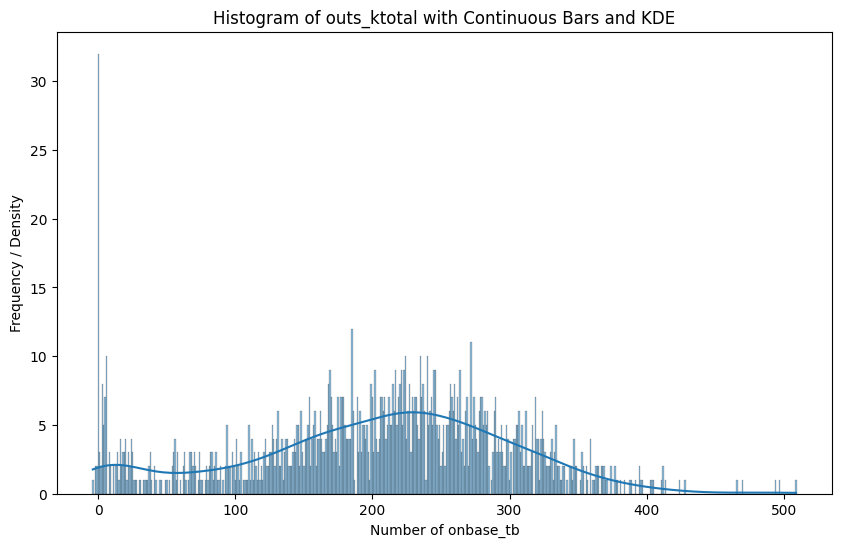

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your final training data is in a DataFrame called final_training_df
target_variable = final_training_df['passing_yards']

plt.figure(figsize=(10, 6))
sns.histplot(target_variable, kde=True, discrete=True)
plt.title('Histogram of outs_ktotal with Continuous Bars and KDE')
plt.xlabel('Number of onbase_tb')
plt.ylabel('Frequency / Density')
plt.show()

In [54]:
target_variable.unique()

array([104., 321., 137., 203., 119.,  25., 186., 178., 236., 281., 257.,
       205.,  99., 264., 174., 190., 192., 248.,   0.,  56., 167., 176.,
       225., 244., 294., 276., 233., 211., 151., 184., 185., 339., 289.,
       256., 112., 274., 226., 305., 272., 306., 424., 240., 177., 298.,
       210., 271., 235., 245., 262., 215., 241., 333., 291., 217., 331.,
       154., 266., 196., 269., 159., 260., 320.,   5.,   1.,   6.,  20.,
        81., 189., 208., 268., 181., 275., 179., 259., 290., 246., 330.,
       347., 231., 377., 166.,  57.,  22.,  54., 141., 180., 209.,  88.,
       170., 132., 228., 265., 146., 158., 221.,  63.,  35., 326., 140.,
       157., 199., 263., 301.,  26., 229.,  62., 316., 201., 150., 110.,
       200., 161., 220.,  89., 111., 138., 247.,  19.,  37., 466., 249.,
       309., 282., 308., 216., 324., 193., 325., 243., 280., 224., 293.,
       237., 173., 338., 145., 234., 207., 288., 317., 365., 175.,  55.,
       163.,  24.,   4., 206., 278., 202., 144., 38

In [55]:
print((target_variable.value_counts(normalize=True).sort_index()))

passing_yards
-4.0      0.000752
-2.0      0.001504
-1.0      0.001504
 0.0      0.024060
 1.0      0.002256
 2.0      0.001504
 3.0      0.006015
 4.0      0.003759
 5.0      0.005263
 6.0      0.007519
 8.0      0.002256
 9.0      0.001504
 11.0     0.001504
 13.0     0.001504
 14.0     0.002256
 15.0     0.000752
 16.0     0.003008
 17.0     0.001504
 18.0     0.002256
 19.0     0.002256
 20.0     0.003008
 21.0     0.000752
 22.0     0.002256
 23.0     0.001504
 24.0     0.003008
 25.0     0.002256
 26.0     0.000752
 27.0     0.000752
 28.0     0.000752
 30.0     0.000752
 31.0     0.000752
 33.0     0.000752
 34.0     0.000752
 35.0     0.000752
 36.0     0.000752
 37.0     0.001504
 38.0     0.002256
 39.0     0.000752
 41.0     0.001504
 42.0     0.000752
 45.0     0.000752
 46.0     0.000752
 49.0     0.000752
 50.0     0.000752
 52.0     0.000752
 54.0     0.001504
 55.0     0.002256
 56.0     0.003008
 57.0     0.000752
 58.0     0.002256
 60.0     0.000752
 62.0     0.00150

In [56]:
# import numpy as np

# Specify the column for analysis
col = 'passing_yards'

# Calculate variance
variance = final_training_df[col].var()
print(f"Variance ({col}): {variance}")

# Calculate standard deviation
std_dev = final_training_df[col].std()
print(f"Standard Deviation ({col}): {std_dev}")

# Calculate range
range_val = final_training_df[col].max() - final_training_df[col].min()
print(f"Range ({col}): {range_val}")

# Calculate interquartile range (IQR)
q1 = final_training_df[col].quantile(0.25)
q3 = final_training_df[col].quantile(0.75)
iqr = q3 - q1
print(f"IQR ({col}): {iqr}")

# Calculate mean absolute deviation (MAD)
mean_val = final_training_df[col].mean()
print(f"Mean ({col}): {mean_val}")  # <--- This line prints the mean
mad = np.mean(np.abs(final_training_df[col] - mean_val))
print(f"Mean Absolute Deviation ({col}): {mad}")

# Calculate coefficient of variation (CV)
cv = (std_dev / mean_val) * 100
print(f"Coefficient of Variation (%) ({col}): {cv}")

# Calculate variance-to-mean ratio (for count data)
if mean_val != 0:
    variance_to_mean = variance / mean_val
    print(f"Variance-to-Mean Ratio ({col}): {variance_to_mean}")
else:
    print(f"Mean is zero for {col}, cannot calculate Variance-to-Mean Ratio.")


Variance (passing_yards): 9544.847561341277
Standard Deviation (passing_yards): 97.69773570222227
Range (passing_yards): 513.0
IQR (passing_yards): 124.0
Mean (passing_yards): 201.36541353383458
Mean Absolute Deviation (passing_yards): 77.80705297077279
Coefficient of Variation (%) (passing_yards): 48.51763467602967
Variance-to-Mean Ratio (passing_yards): 47.400630494757216


In [57]:
X = final_training_df.drop(columns=['passing_yards'])
y = final_training_df['passing_yards']

In [58]:
X.columns

Index(['venue_capacity', 'venue_surface', 'venue_roof_type',
       'passing_attempts_prev_7_games_career_sum',
       'passing_completions_prev_7_games_career_sum',
       'passing_cmp_pct_prev_7_games_career_mean',
       'passing_yards_prev_7_games_career_sum',
       'passing_avg_yards_prev_7_games_career_mean',
       'passing_touchdowns_prev_7_games_career_sum',
       'passing_interceptions_prev_7_games_career_sum',
       'passing_rating_prev_7_games_career_mean',
       'passing_first_downs_prev_7_games_career_sum',
       'passing_redzone_attempts_prev_7_games_career_sum',
       'passing_int_touchdowns_prev_7_games_career_sum',
       'passing_longest_prev_7_games_career_mean',
       'passing_longest_touchdown_prev_7_games_career_mean',
       'passing_air_yards_prev_7_games_career_sum',
       'passing_on_target_throws_prev_7_games_career_sum',
       'passing_defended_passes_prev_7_games_career_sum',
       'passing_dropped_passes_prev_7_games_career_sum',
       'passing

In [59]:
X.shape

(1330, 65)

In [60]:
X.dtypes

venue_capacity                                               int64
venue_surface                                                int64
venue_roof_type                                              int64
passing_attempts_prev_7_games_career_sum                   float64
passing_completions_prev_7_games_career_sum                float64
passing_cmp_pct_prev_7_games_career_mean                   float64
passing_yards_prev_7_games_career_sum                      float64
passing_avg_yards_prev_7_games_career_mean                 float64
passing_touchdowns_prev_7_games_career_sum                 float64
passing_interceptions_prev_7_games_career_sum              float64
passing_rating_prev_7_games_career_mean                    float64
passing_first_downs_prev_7_games_career_sum                float64
passing_redzone_attempts_prev_7_games_career_sum           float64
passing_int_touchdowns_prev_7_games_career_sum             float64
passing_longest_prev_7_games_career_mean                   flo

In [61]:
# X.to_csv('../../../data/spain_soccer_shots_on_target_training_data_v002.csv', index= False)

In [62]:
for column in X.columns:
    # Check if the column is of boolean type
    if X[column].dtype == 'bool':
        # Convert the boolean column to integers (1 for True, 0 for False)
        X[column] = X[column].astype(int)

In [63]:
# X['opponent'] = X['opponent'].apply(lambda x:str(x))

#### poisson regressor

In [64]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Example: X (features), y (strikeouts)
# X = sm.add_constant(X)  # statsmodels requires constant
# Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = X,y

In [65]:
print(X_train.dtypes, y_train.dtypes)

venue_capacity                                               int64
venue_surface                                                int64
venue_roof_type                                              int64
passing_attempts_prev_7_games_career_sum                   float64
passing_completions_prev_7_games_career_sum                float64
passing_cmp_pct_prev_7_games_career_mean                   float64
passing_yards_prev_7_games_career_sum                      float64
passing_avg_yards_prev_7_games_career_mean                 float64
passing_touchdowns_prev_7_games_career_sum                 float64
passing_interceptions_prev_7_games_career_sum              float64
passing_rating_prev_7_games_career_mean                    float64
passing_first_downs_prev_7_games_career_sum                float64
passing_redzone_attempts_prev_7_games_career_sum           float64
passing_int_touchdowns_prev_7_games_career_sum             float64
passing_longest_prev_7_games_career_mean                   flo

#### Poisson Regressor

In [66]:
# poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Predict expected strikeouts (λ)
# lambda_pred = poisson_model.predict(X_train)

In [67]:
# deviance = poisson_model.deviance
# aic = poisson_model.aic
# model_df = poisson_model.df_model
# residual_df = poisson_model.df_resid

# print("Deviance:", deviance)
# print("AIC:", aic)
# print(f"Model Degrees of Freedom: {model_df}")
# print(f"Residual Degrees of Freedom: {residual_df}")
# print(f'devience to residual df ratio: {deviance/residual_df}')

In [68]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100,  # Number of trees in the forest
                                 random_state=42,
                                 n_jobs=-1,       # Use all available cores
                                 max_depth=10,    # Maximum depth of the trees (tune this)
                                 min_samples_split=2, # Minimum samples required to split a node (tune this)
                                 min_samples_leaf=1)  # Minimum samples required at a leaf node (tune this)

rf_model.fit(X_train, y_train)



RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# with open('../../../models/nfl_qb_passing_yards_2023_24_entire_data_player_opponent_stats_v002.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [72]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

C:\Users\ManabodhaMahananda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

##### function to calculate the prediction and the over and under probability

In [ ]:
def predict(model, y_test, threshold):

    strikeout_prediction = model.predict(y_test)
    y_test = y_test.values.reshape(1, -1) \
                              if isinstance(y_test, pd.Series) \
                              else y_test.reshape(1, -1)
    
    preds_array = np.array([tree.predict(y_test)[0] for tree in model.estimators_])

    mean_pred = np.mean(preds_array)
    std_dev_pred = np.std(preds_array)

    # Create the fitted normal distribution
    fitted_normal_dist = norm(loc=mean_pred, scale=std_dev_pred)

    if std_dev_pred == 0:
        prob_over_threshold = 1.0 if strikeout_prediction > threshold else 0.0
        prob_under_threshold = 1.0 - prob_over_threshold
    else:
        # Create the fitted normal distribution
        fitted_normal_dist = norm(loc=mean_pred, scale=std_dev_pred)

        # Calculate probability over the threshold (Survival Function)
        prob_over_threshold = fitted_normal_dist.sf(threshold)

        # Calculate probability under the threshold (Cumulative Distribution Function)
        prob_under_threshold = fitted_normal_dist.cdf(threshold)

    print(f"Overall Prediction: {strikeout_prediction:.4f}")
    print(f"Parametric P(X > {threshold}) (Over Probability): {prob_over_threshold:.4f}")
    print(f"Parametric P(X <= {threshold}) (Under Probability): {prob_under_threshold:.4f}")

    return {
        'overall_prediction': strikeout_prediction,
        'prob_over_threshold': prob_over_threshold,
        'prob_under_threshold': prob_under_threshold
    }
        

##### calculate the over probability using prediction distribution

In [ ]:
X_exp = X_test.iloc[0]
y_exp = y_test.iloc[0]

X_exp = X_exp.values.reshape(1, -1) \
                              if isinstance(X_exp, pd.Series) \
                              else X_exp.reshape(1, -1)
X_exp

array([[7.48670000e+04, 0.00000000e+00, 1.00000000e+00, 2.07000000e+02,
        1.12000000e+02, 5.53151429e+01, 1.16100000e+03, 5.60885714e+00,
        2.00000000e+00, 4.00000000e+00, 6.64571429e+01, 4.60000000e+01,
        1.20000000e+01, 0.00000000e+00, 2.97142857e+01, 1.10000000e+01,
        7.17000000e+02, 1.31000000e+02, 1.80000000e+01, 1.10000000e+01,
        1.70000000e+01, 4.80000000e+01, 1.00000000e+00, 2.00000000e+00,
        2.60000000e+01, 1.91000000e+02, 9.40000000e+01, 1.70000000e+01,
        2.00000000e+01, 5.83156000e+02, 2.82957143e+00, 2.76000000e+02,
        1.50000000e+02, 4.26000000e+02, 1.60000000e+01, 1.06000000e+02,
        4.00000000e+00, 3.60000000e+01, 5.00000000e+00, 4.00000000e+00,
        3.50000000e+01, 2.80000000e+01, 1.24000000e+02, 0.00000000e+00,
        1.17000000e+02, 1.00000000e+01, 1.50000000e+01, 4.30000000e+01,
        8.00000000e+00, 2.03000000e+02, 1.33000000e+02, 1.80000000e+01,
        3.00000000e+00, 6.00000000e+00, 2.00000000e+00, 2.142857

In [ ]:
trees = rf_model.estimators_
# trees

In [ ]:
# all_preds = [tree.predict(X_exp) for tree in trees]
# all_preds
all_predictions = []
for tree in trees:
    predictions = tree.predict(X_exp)
    all_predictions.append(predictions)
all_predictions

[array([117.4]),
 array([127.]),
 array([58.]),
 array([209.94505495]),
 array([179.42105263]),
 array([99.]),
 array([171.33333333]),
 array([58.]),
 array([101.6]),
 array([213.88392857]),
 array([186.82758621]),
 array([207.4]),
 array([160.01204819]),
 array([145.]),
 array([9.2]),
 array([278.]),
 array([80.35294118]),
 array([247.81818182]),
 array([121.]),
 array([58.]),
 array([312.]),
 array([95.88888889]),
 array([249.]),
 array([182.38738739]),
 array([231.66666667]),
 array([213.02702703]),
 array([209.05405405]),
 array([238.0625]),
 array([350.6]),
 array([201.58823529]),
 array([189.2]),
 array([153.12244898]),
 array([89.]),
 array([187.5915493]),
 array([140.85714286]),
 array([94.]),
 array([120.66666667]),
 array([256.]),
 array([363.]),
 array([132.61111111]),
 array([186.]),
 array([193.6]),
 array([88.25531915]),
 array([229.75]),
 array([251.52941176]),
 array([43.5]),
 array([314.8]),
 array([181.]),
 array([89.]),
 array([154.94059406]),
 array([94.]),
 array([

In [ ]:
preds_array = np.array([arr[0] for arr in all_predictions])

preds_array

array([117.4       , 127.        ,  58.        , 209.94505495,
       179.42105263,  99.        , 171.33333333,  58.        ,
       101.6       , 213.88392857, 186.82758621, 207.4       ,
       160.01204819, 145.        ,   9.2       , 278.        ,
        80.35294118, 247.81818182, 121.        ,  58.        ,
       312.        ,  95.88888889, 249.        , 182.38738739,
       231.66666667, 213.02702703, 209.05405405, 238.0625    ,
       350.6       , 201.58823529, 189.2       , 153.12244898,
        89.        , 187.5915493 , 140.85714286,  94.        ,
       120.66666667, 256.        , 363.        , 132.61111111,
       186.        , 193.6       ,  88.25531915, 229.75      ,
       251.52941176,  43.5       , 314.8       , 181.        ,
        89.        , 154.94059406,  94.        , 145.78947368,
       322.71428571, 239.5       ,  81.75      , 263.2173913 ,
       112.6969697 ,  56.        , 137.        , 171.        ,
       149.52941176,  25.        , 170.27777778, 125.22

In [ ]:
pred_err = preds_array-y_exp
pred_err

array([ 33.4       ,  43.        , -26.        , 125.94505495,
        95.42105263,  15.        ,  87.33333333, -26.        ,
        17.6       , 129.88392857, 102.82758621, 123.4       ,
        76.01204819,  61.        , -74.8       , 194.        ,
        -3.64705882, 163.81818182,  37.        , -26.        ,
       228.        ,  11.88888889, 165.        ,  98.38738739,
       147.66666667, 129.02702703, 125.05405405, 154.0625    ,
       266.6       , 117.58823529, 105.2       ,  69.12244898,
         5.        , 103.5915493 ,  56.85714286,  10.        ,
        36.66666667, 172.        , 279.        ,  48.61111111,
       102.        , 109.6       ,   4.25531915, 145.75      ,
       167.52941176, -40.5       , 230.8       ,  97.        ,
         5.        ,  70.94059406,  10.        ,  61.78947368,
       238.71428571, 155.5       ,  -2.25      , 179.2173913 ,
        28.6969697 , -28.        ,  53.        ,  87.        ,
        65.52941176, -59.        ,  86.27777778,  41.22

In [ ]:
np.mean(preds_array)

np.float64(167.7619693148267)

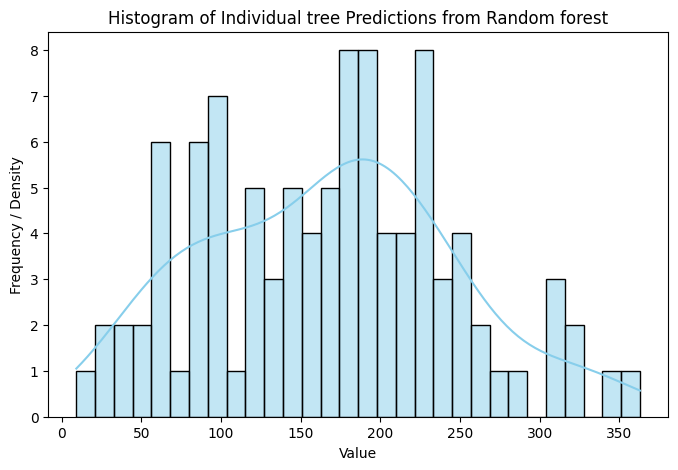

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5)) # Optional: Set figure size for better readability

sns.histplot(data=preds_array, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency / Density") # Y-axis label changes if kde=True
plt.title("Histogram of Individual tree Predictions from Random forest")

# Display the plot
plt.show()

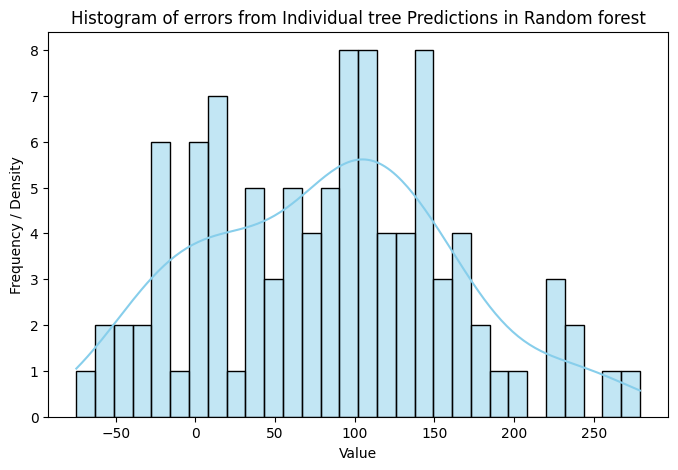

In [ ]:
plt.figure(figsize=(8, 5)) # Optional: Set figure size for better readability

sns.histplot(data=pred_err, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency / Density") # Y-axis label changes if kde=True
plt.title("Histogram of errors from Individual tree Predictions in Random forest")

# Display the plot
plt.show()

In [ ]:
# with open('../../../models/spain_soccer_rf_2024_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 6560.43
Mean Absolute Error (MAE): 65.18
R-squared (R2): 0.29


In [ ]:
# Note on handling count data with RandomForestRegressor:
# RandomForestRegressor predicts continuous values. For count data, the predictions will be floating-point numbers.
# You might want to round these predictions to the nearest integer for interpretation as counts.
y_pred_rounded = np.round(y_pred).astype(int)

print("\nRounded Predictions (first 20):")
print(y_pred_rounded[:20])
print("\nActual Test Values (first 20):")
print(y_test.head(20).values)

# Evaluate rounded predictions (
mse_rounded = mean_squared_error(y_test, y_pred_rounded)
mae_rounded = mean_absolute_error(y_test, y_pred_rounded)
r2_rounded = r2_score(y_test, y_pred_rounded)

print("\nRandom Forest Regressor Evaluation (Rounded Predictions):")
print(f"Mean Squared Error (MSE): {mse_rounded:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rounded:.2f}")
print(f"R-squared (R2): {r2_rounded:.2f}")


Rounded Predictions (first 20):
[168 241 266  62  85  43 193 128 225 269 176 219 242 254 244 212 198 277
 141 166]

Actual Test Values (first 20):
[ 84. 249. 365.  83.   5.   0.  71. 136. 162. 281. 131. 280. 324. 222.
 180. 226. 282. 273.   0. 304.]

Random Forest Regressor Evaluation (Rounded Predictions):
Mean Squared Error (MSE): 6563.05
Mean Absolute Error (MAE): 65.18
R-squared (R2): 0.29


In [ ]:
# Define the bins (bucket boundaries)
bins = [-1, 0, 5, 10, 50, 100, 200, 400, float('inf')] # -1 to capture exactly 0, float('inf') for the open-ended last bucket

# Define the labels for each bucket
labels = ['<0', '0-5', '5-10', '10-50', '50-100', '100-200', '200-400', '400+']

# Use pd.cut to categorize the data into buckets
y_test_buckets = pd.cut(y_train, bins=bins, labels=labels, right=False)
# 'right=False' means the bins include the left boundary but exclude the right boundary,
# e.g., [0, 5) means 0 up to (but not including) 5.

# Get the count of values in each bucket
distribution = y_test_buckets.value_counts().sort_index()
print(distribution)

passing_yards
<0           1
0-5         39
5-10        14
10-50       46
50-100      65
100-200    275
200-400    565
400+        13
Name: count, dtype: int64


In [ ]:
# # Assuming X_test contains the features for prediction
# y_pred = rf_model.predict(X_test)

# # Assuming y_test is a DataFrame or you want to create one for results
# # If y_test is a Series, convert it to a DataFrame first if you want to add a new column
# if isinstance(y_test, pd.Series):
#     y_test_df = y_test.to_frame(name='actual_values') # Name the column appropriately
# else:
#     y_test_df = y_test

# y_test_df['preds'] = y_pred
# y_test_df.to_csv('../../../data/spain_soccer_shots_on_target_y_test.csv', index=False)

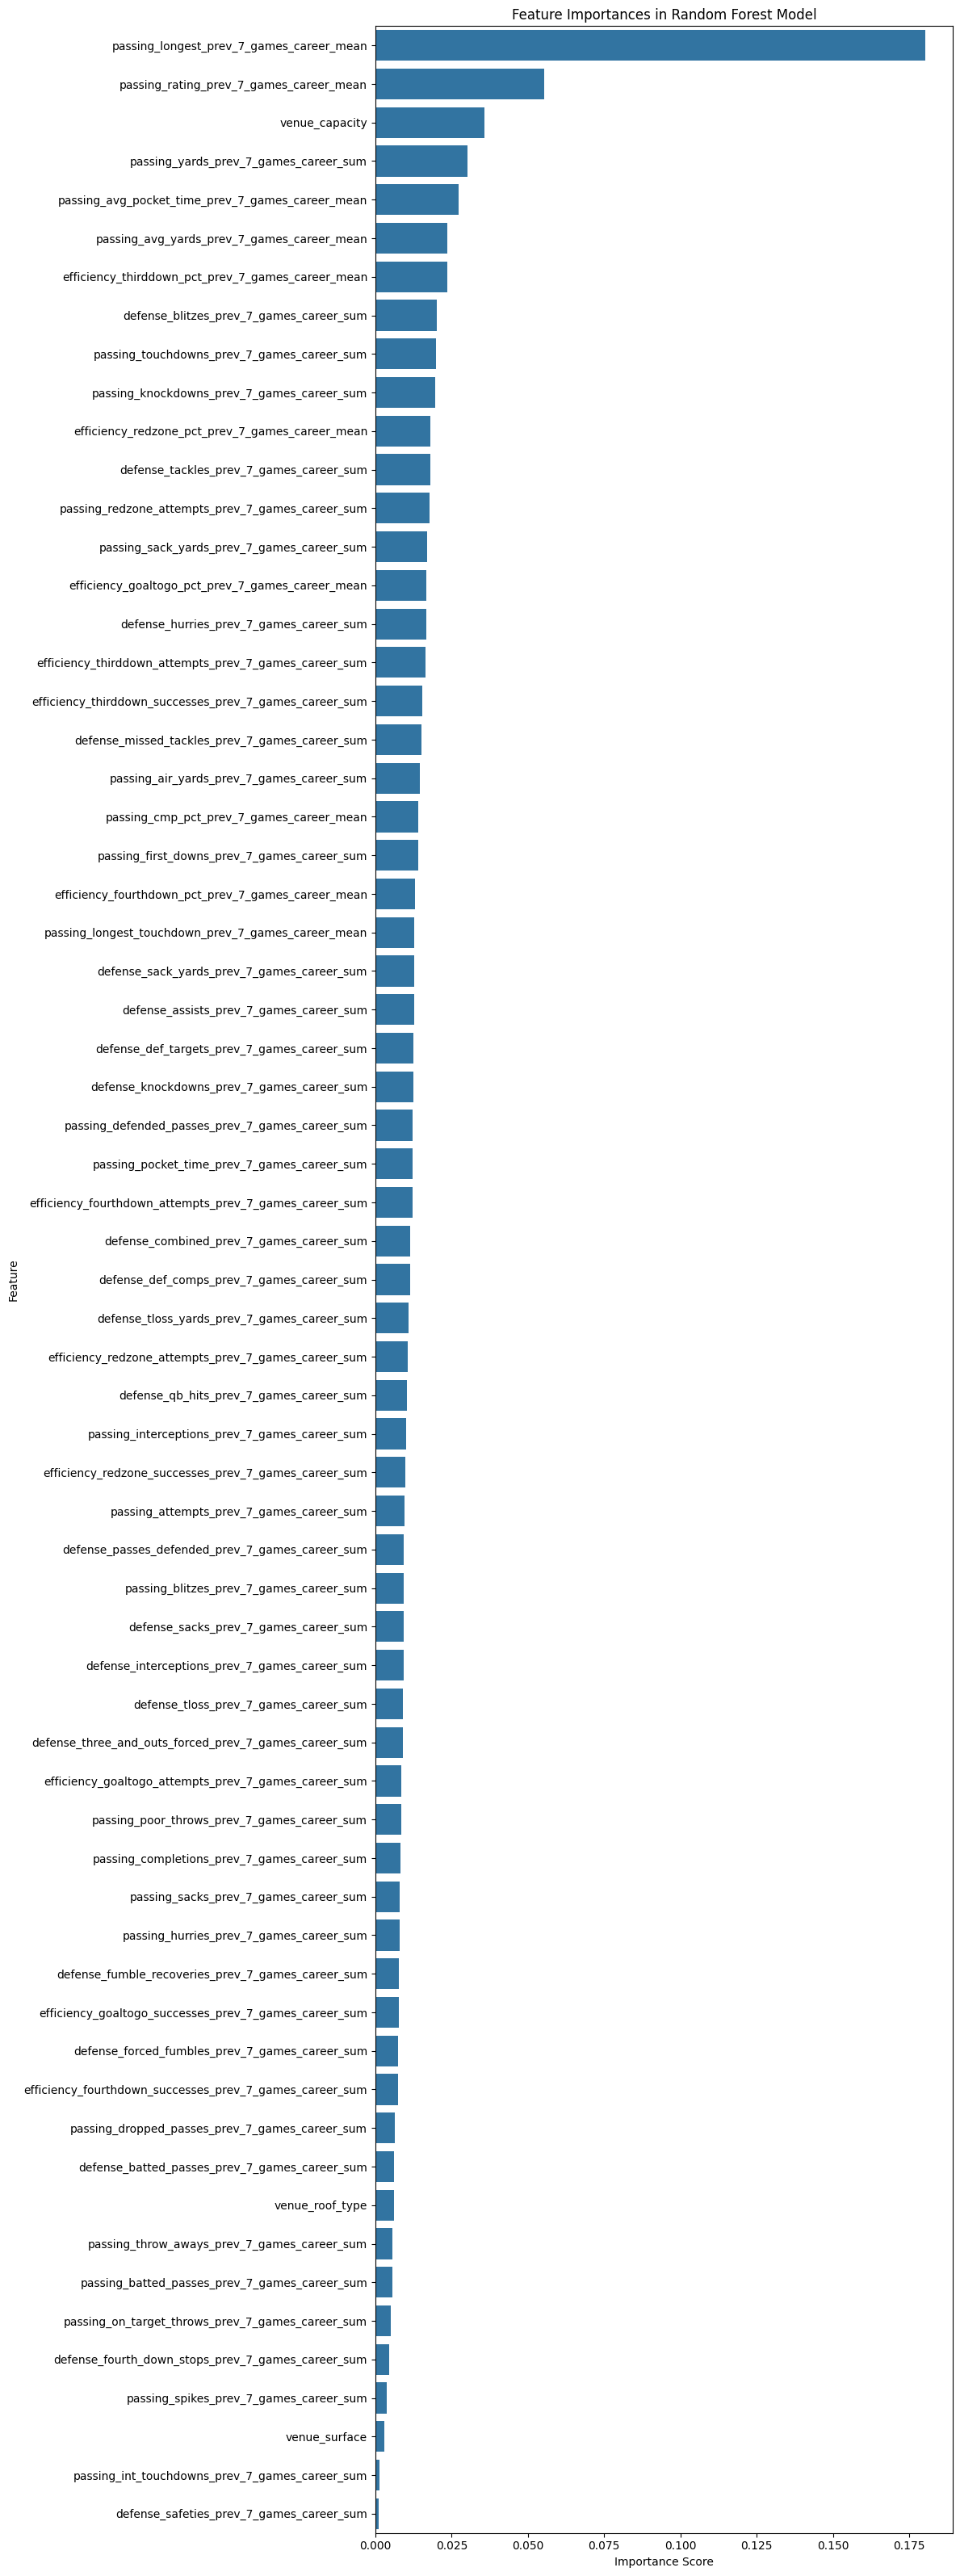


Feature Importance:
passing_longest_prev_7_games_career_mean: 0.1802
passing_rating_prev_7_games_career_mean: 0.0553
venue_capacity: 0.0357
passing_yards_prev_7_games_career_sum: 0.0301
passing_avg_pocket_time_prev_7_games_career_mean: 0.0272
passing_avg_yards_prev_7_games_career_mean: 0.0237
efficiency_thirddown_pct_prev_7_games_career_mean: 0.0234
defense_blitzes_prev_7_games_career_sum: 0.0203
passing_touchdowns_prev_7_games_career_sum: 0.0197
passing_knockdowns_prev_7_games_career_sum: 0.0195
efficiency_redzone_pct_prev_7_games_career_mean: 0.0181
defense_tackles_prev_7_games_career_sum: 0.0180
passing_redzone_attempts_prev_7_games_career_sum: 0.0178
passing_sack_yards_prev_7_games_career_sum: 0.0170
efficiency_goaltogo_pct_prev_7_games_career_mean: 0.0168
defense_hurries_prev_7_games_career_sum: 0.0168
efficiency_thirddown_attempts_prev_7_games_career_sum: 0.0163
efficiency_thirddown_successes_prev_7_games_career_sum: 0.0153
defense_missed_tackles_prev_7_games_career_sum: 0.0152


In [ ]:
# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
sorted_feature_names = [item[0] for item in sorted_importance]
sorted_importances = [item[1] for item in sorted_importance]

# Create the bar plot
plt.figure(figsize=(12, 32))
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

In [ ]:
with open('../../../../models/nfl_qb_passing_yards_2023_24_player_opponent_stats_v001.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [ ]:
to stop the execution of the script here

SyntaxError: invalid syntax (3122771044.py, line 1)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

n_splits = 5 # For example, 5-fold cross-validation

print(f"Performing {n_splits}-fold cross-validation...")

# --- Evaluate using Mean Squared Error (MSE) ---
# cross_val_score by default tries to maximize the score, so for MSE (which is a loss),
# we need to specify 'neg_mean_squared_error' and then negate the result.
mse_scores = -cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='neg_mean_squared_error', n_jobs=-1)
print(f"Cross-validated MSE scores for each fold: {mse_scores}")
print(f"Mean Cross-validated MSE: {np.mean(mse_scores):.4f}")
print(f"Standard Deviation of Cross-validated MSE: {np.std(mse_scores):.4f}")

print("\n" + "="*50 + "\n")

# --- Evaluate using Mean Absolute Error (MAE) ---
mae_scores = -cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='neg_mean_absolute_error', n_jobs=-1)
print(f"Cross-validated MAE scores for each fold: {mae_scores}")
print(f"Mean Cross-validated MAE: {np.mean(mae_scores):.4f}")
print(f"Standard Deviation of Cross-validated MAE: {np.std(mae_scores):.4f}")

print("\n" + "="*50 + "\n")

# --- Evaluate using R-squared (R2) ---
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='r2', n_jobs=-1)
print(f"Cross-validated R2 scores for each fold: {r2_scores}")
print(f"Mean Cross-validated R2: {np.mean(r2_scores):.4f}")
print(f"Standard Deviation of Cross-validated R2: {np.std(r2_scores):.4f}")

print("\nCross-validation complete.")


Performing 5-fold cross-validation...
Cross-validated MSE scores for each fold: [7096.81764026 8090.01563529 6566.38425663 8721.79183094 7777.67167597]
Mean Cross-validated MSE: 7650.5362
Standard Deviation of Cross-validated MSE: 753.5096


Cross-validated MAE scores for each fold: [68.0152461  71.00851879 63.70976957 74.9660678  70.09437392]
Mean Cross-validated MAE: 69.5588
Standard Deviation of Cross-validated MAE: 3.6938


Cross-validated R2 scores for each fold: [0.25930297 0.15045022 0.30746889 0.14410036 0.15539288]
Mean Cross-validated R2: 0.2033
Standard Deviation of Cross-validated R2: 0.0672

Cross-validation complete.


In [ ]:
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter Tuning with GridSearchCV ---
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees
    'max_depth': [None, 10, 20],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
# We use 'neg_mean_squared_error' as the scoring metric for tuning
# cv=n_splits ensures that tuning is also done with cross-validation
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=n_splits,
                           scoring='neg_mean_squared_error', # Use a single metric for tuning
                           n_jobs=-1,
                           verbose=2) # Set verbose to 2 to see progress

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("\nHyperparameter tuning complete.")

# Print the best parameters and best score found
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated MSE (negative, so smaller absolute value is better): {-grid_search.best_score_:.4f}")

# Get the best model
best_rf_model = grid_search.best_estimator_
print("\nBest Random Forest Regressor model (after tuning):")
print(best_rf_model)

# You can now use best_rf_model for final predictions on X_test
# For example:
y_pred_tuned = best_rf_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"\nMSE on test set with tuned model: {mse_tuned:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Hyperparameter tuning complete.
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validated MSE (negative, so smaller absolute value is better): 7606.5450

Best Random Forest Regressor model (after tuning):
RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      n_jobs=-1, random_state=42)

MSE on test set with tuned model: 7068.4035


In [ ]:
rf_model_hp_tuned = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42)

rf_model_hp_tuned.fit(X_train, y_train)

y_preds_hp = rf_model_hp_tuned.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_preds_hp)
mae = mean_absolute_error(y_test, y_preds_hp)
r2 = r2_score(y_test, y_preds_hp)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 7068.40
Mean Absolute Error (MAE): 68.15
R-squared (R2): 0.25


In [ ]:
# with open('../../../models/spain_soccer_strikeouts_rf_hp_tuned_2024_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)
# with open('../../../../models/nfl_qb_passing_yards_v002.pkl', 'wb') as f:
#     pickle.dump(rf_model_hp_tuned, f)

In [ ]:
print("Fitting Zero-Inflated Poisson (ZIP) Model...")
try:
    zip_model = sm.ZeroInflatedPoisson(
        endog=y_train,        # Dependent variable (counts)
        exog=X_train,         # Independent variables for the count part (Poisson) - now includes constant
        exog_infl=X_train     # Independent variables for the zero-inflation part (logistic) - now includes constant
    )

    # Fit the model
    zip_results = zip_model.fit()

    print("\nZIP Model Summary:")
    print(zip_results.summary())
    print("-" * 50)

    # --- 3. Make Predictions ---
    # Predictions from ZeroInflatedPoisson are expected values (can be float)
    y_pred_zip_continuous = zip_results.predict(exog=X_test, exog_infl=X_test) # Updated: Use X_test directly

    # Since the target is counts, post-process by rounding and ensuring non-negativity
    y_pred_zip_final = np.round(y_pred_zip_continuous)
    y_pred_zip_final = np.maximum(0, y_pred_zip_final) # Ensure no negative counts

    print("\nPredictions made and post-processed.")
    print(f"Sample of continuous predictions: {y_pred_zip_continuous[:5]}")
    print(f"Sample of final (rounded & clipped) predictions: {y_pred_zip_final[:5]}")
    print("-" * 50)

    # --- 4. Evaluate the Model ---
    print("Evaluating ZIP Model performance:")
    mse = mean_squared_error(y_test, y_pred_zip_final)
    mae = mean_absolute_error(y_test, y_pred_zip_final)
    r2 = r2_score(y_test, y_pred_zip_final)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-" * 50)

except Exception as e:
    print(f"An error occurred during model fitting or prediction: {e}")
    print("Please ensure your 'endog' (y) values are non-negative and your 'exog' (X) values are appropriate.")
    print("Also, ensure 'statsmodels' is installed (`pip install statsmodels`).")

Fitting Zero-Inflated Poisson (ZIP) Model...


C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:1331: RuntimeWarning: overflow encountered in exp
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pytho

         Current function value: 4251.490799
         Iterations: 5
         Function evaluations: 48
         Gradient evaluations: 27


C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:629: RuntimeWarning: overflow encountered in exp
  coeff = (1 + w[zero_idx] * (np.exp(mu[zero_idx]) - 1))
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:637: RuntimeWarning: overflow encountered in exp
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:637: RuntimeWarning: invalid value encountered in divide
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\si


ZIP Model Summary:
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:             runs_earned   No. Observations:                15773
Model:             ZeroInflatedPoisson   Df Residuals:                    15593
Method:                            MLE   Df Model:                          179
Date:                 Tue, 27 May 2025   Pseudo R-squ.:                  -3171.
Time:                         10:51:40   Log-Likelihood:            -6.7059e+07
converged:                       False   LL-Null:                       -21141.
Covariance Type:             nonrobust   LLR p-value:                     1.000
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
inflate_venue_capacity                                                

C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
